In [1]:
# LIBS
import geopandas as gpd
import os
import matplotlib

# Roteiro

- Abrindo e Salvando ShapefiLes
- Filtros e Atualização de campos do Datasets
    - Utilizando LOC
    - Utilizando ILOC
    - Filtro NP.WHERE
- Análises Espaciais
    - Centroids
    - SJOIN
    - OVERLAY

# Abrindo e Salvando Shapefiles

In [2]:
# get actual foder path + data file path
path = os.getcwd() + '/dados/municipios.shp'

# read file
data = gpd.read_file(path)

<AxesSubplot:>

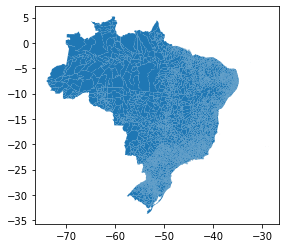

In [3]:
data.plot()

In [4]:
type(data)

geopandas.geodataframe.GeoDataFrame

In [5]:
# show GeodataFrame
data.head()

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,None,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,None,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
4,5,160,5201306,Anicuns,GO,Centro-Oeste,None,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3..."


In [6]:
# sistema de referecia de coordenada
data.crs

<Geographic 2D CRS: EPSG:4674>
Name: SIRGAS 2000
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: Latin America - SIRGAS 2000 by country
- bounds: (-122.19, -59.87, -25.28, 32.72)
Datum: Sistema de Referencia Geocentrico para las AmericaS 2000
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [7]:
# fitrar por linha 0-2
filtro = data[:4]
filtro

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,None,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,None,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,None,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,None,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."


In [8]:
# salvando novo shapefile em novo arquivo
path_out = os.getcwd() + '/dados/municipios_filter.shp'
filtro.to_file(path_out)

<AxesSubplot:>

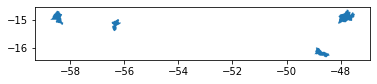

In [9]:
# abrindo novo shapefile e plotando
data_filter = gpd.read_file(path_out)
data_filter.plot()

# Utiizando LOC

In [10]:
# utilizando loc
# loc: tem cm referencia linha e coluna
data.loc[:10,:'uf']

,id,id_pk,geocodigo,municipio,uf
0,1,1,5100102,Acorizal,MT
1,2,104,5107156,Reserva Do Cabaçal,MT
2,3,144,5200100,Abadiânia,GO
3,4,147,5200175,Água Fria De Goiás,GO
4,5,160,5201306,Anicuns,GO
5,6,157,5200902,Amorinópolis,GO
6,7,357,5219803,São Domingos,GO
7,8,358,5219902,São Francisco De Goiás,GO
8,9,163,5201504,Aporé,GO
9,10,172,5203104,Baliza,GO


In [11]:
# pandas series
print(type(data.loc[2]))
data.loc[2]

<class 'pandas.core.series.Series'>


id                                                           3
id_pk                                                      144
geocodigo                                              5200100
municipio                                            Abadiânia
uf                                                          GO
regiao                                            Centro-Oeste
area                                                      None
geometry     POLYGON ((-48.91412123317579 -16.0870191010398...
Name: 2, dtype: object

In [12]:
# filtros por id
data['id'] > 6125

0       False
1       False
2       False
3       False
4       False
        ...  
6124    False
6125     True
6126     True
6127     True
6128     True
Name: id, Length: 6129, dtype: bool

In [13]:
# filtros por id
filtro_id = data['id'] > 6125
data.loc[filtro_id]

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,None,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,None,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,None,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."
6128,6129,6128,4128708,Vitorino,PR,Sul,None,"POLYGON ((-52.86974 -26.22005, -52.86972 -26.2..."


In [14]:
# filtros por id e cod
# operadores no geopandas sao diferentes
# and - &
# or  - |
# ...
filtro_id = (data['id'] > 6125) & (data['geocodigo'] == '4128500')
data.loc[filtro_id]

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,None,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."


In [15]:
# atualizando todas as linhas da coluna area
data['area'] = data.loc[:, 'geometry'].area
data

<ipython-input-15-eb197464e177>:2: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  data['area'] = data.loc[:, 'geometry'].area


,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
0,1,1,5100102,Acorizal,MT,Centro-Oeste,0.070693,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2..."
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,0.112314,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0..."
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,0.088319,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0..."
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,0.170463,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7..."
4,5,160,5201306,Anicuns,GO,Centro-Oeste,0.082837,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3..."
...,...,...,...,...,...,...,...,...
6124,6125,6120,4128401,Uraí,PR,Sul,0.020978,"POLYGON ((-50.89000 -23.14711, -50.87139 -23.1..."
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,0.035269,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,0.029250,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,0.085576,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."


# Utilizando ILOC

In [16]:
# iloc trabalha somente com numeros
data.iloc[:4,:4]

,id,id_pk,geocodigo,municipio
0,1,1,5100102,Acorizal
1,2,104,5107156,Reserva Do Cabaçal
2,3,144,5200100,Abadiânia
3,4,147,5200175,Água Fria De Goiás


# Filtro NP.WHERE

In [17]:
# criando uma nova coluna, preenchendo valores com condição do np.where
import numpy as np
data['classe'] = np.where(data['area'] > 0.1, 1, 0)
data

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry,classe
0,1,1,5100102,Acorizal,MT,Centro-Oeste,0.070693,"POLYGON ((-56.28986 -15.23886, -56.28991 -15.2...",0
1,2,104,5107156,Reserva Do Cabaçal,MT,Centro-Oeste,0.112314,"POLYGON ((-58.50758 -15.00500, -58.72273 -15.0...",1
2,3,144,5200100,Abadiânia,GO,Centro-Oeste,0.088319,"POLYGON ((-48.91412 -16.08702, -48.91283 -16.0...",0
3,4,147,5200175,Água Fria De Goiás,GO,Centro-Oeste,0.170463,"POLYGON ((-47.85740 -14.76522, -47.85657 -14.7...",1
4,5,160,5201306,Anicuns,GO,Centro-Oeste,0.082837,"POLYGON ((-49.98332 -16.32660, -49.98259 -16.3...",0
...,...,...,...,...,...,...,...,...,...
6124,6125,6120,4128401,Uraí,PR,Sul,0.020978,"POLYGON ((-50.89000 -23.14711, -50.87139 -23.1...",0
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,0.035269,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7...",0
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,0.029250,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9...",0
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,0.085576,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3...",0


# CENTROIDS

In [18]:
# get actual foder path + data file path and read file
path = os.getcwd() + '/dados/municipios.shp'
municipios = gpd.read_file(path)

path_aeroportos = os.getcwd() + '/dados/aeroportos.shp'
aeroportos = gpd.read_file(path_aeroportos)

In [19]:
# filtra por UF,
municipios['uf'] == 'PR'

0       False
1       False
2       False
3       False
4       False
        ...  
6124     True
6125     True
6126     True
6127     True
6128     True
Name: uf, Length: 6129, dtype: bool

In [20]:
# filtra por UF, retornando todas as linhas que são relativas ao Paraná
municipios_pr = municipios[municipios['uf'] == 'PR']
municipios_pr

,id,id_pk,geocodigo,municipio,uf,regiao,area,geometry
847,901,5894,4111555,Ivaté,PR,Sul,None,"POLYGON ((-53.44312 -23.39659, -53.44272 -23.3..."
1290,1291,5987,4118501,Pato Branco,PR,Sul,None,"POLYGON ((-52.71938 -26.14383, -52.71981 -26.1..."
1291,1292,6016,4120606,Prudentópolis,PR,Sul,None,"POLYGON ((-51.33459 -24.92907, -51.33538 -24.9..."
1292,1293,6017,4120655,Quarto Centenário,PR,Sul,None,"POLYGON ((-53.12084 -24.40744, -53.12148 -24.4..."
1293,1294,6018,4120705,Quatiguá,PR,Sul,None,"POLYGON ((-49.92294 -23.55713, -49.92351 -23.5..."
...,...,...,...,...,...,...,...,...
6124,6125,6120,4128401,Uraí,PR,Sul,None,"POLYGON ((-50.89000 -23.14711, -50.87139 -23.1..."
6125,6126,6121,4128500,Wenceslau Braz,PR,Sul,None,"POLYGON ((-49.79156 -23.73905, -49.79150 -23.7..."
6126,6127,6123,4128559,Vera Cruz Do Oeste,PR,Sul,None,"POLYGON ((-53.87662 -24.99329, -53.87627 -24.9..."
6127,6128,6125,4128625,Alto Paraíso,PR,Sul,None,"POLYGON ((-53.79019 -23.37994, -53.78410 -23.3..."


In [21]:
# centroids de todos dos municipios do Paraná
municipios_pr.centroid

<ipython-input-21-9ee4570ce0da>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios_pr.centroid


847     POINT (-53.42428 -23.35385)
1290    POINT (-52.66321 -26.16902)
1291    POINT (-51.10320 -25.12722)
1292    POINT (-53.15533 -24.30314)
1293    POINT (-49.93190 -23.56212)
                   ...             
6124    POINT (-50.82992 -23.21633)
6125    POINT (-49.78450 -23.85512)
6126    POINT (-53.92046 -25.00737)
6127    POINT (-53.82465 -23.53884)
6128    POINT (-52.80779 -26.28122)
Length: 399, dtype: geometry

<ipython-input-22-4c8cfd1be8d0>:2: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  municipios_pr.centroid.plot()


<AxesSubplot:>

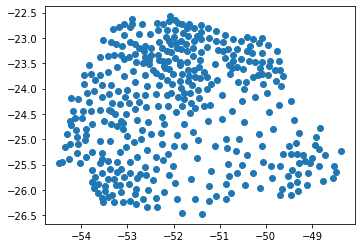

In [22]:
# plot dos centroids de todos dos municipios do Paraná
municipios_pr.centroid.plot()

# SJOIN

SJOIN -> possui duas entradas e uma operação

- WITHIN
- CONTAINS
- INTERSECTS
- OVERLAY

In [23]:
# WITHIN

# retorna aeroportos que estão dentro/contidos do Paraná
# retorna as colunas de ambos os datasets
aeroportos_pr = gpd.sjoin(aeroportos, municipios_pr, op='within')
aeroportos_pr.head()

,OBJECTID,FID_1,cod_icao,nm_municip,TipoAero,nome,largura_m,num_pista,uf_left,altitude,...,GEOCODIGO,geometry,index_right,id,id_pk,geocodigo,municipio,uf_right,regiao,area
366,367,364,SSKM,Campo Mourão,Nacional,Campo Mourão,30.0,1,PR,565.0,...,4104303.0,POINT (-52.35694 -24.00250),5950,5951,5791,4104303,Campo Mourão,PR,Sul,None
367,368,365,SBCA,Cascavel,Nacional,Cascavel,30.0,1,PR,754.0,...,4104808.0,POINT (-53.50194 -25.00222),1734,1719,5799,4104808,Cascavel,PR,Sul,None
922,923,923,SILQ,Cascavel,Nacional,Clube de Ultraleves Aeroleve S/C,20.0,1,PR,650.0,...,4104808.0,POINT (-53.49833 -24.92667),1734,1719,5799,4104808,Cascavel,PR,Sul,None
368,369,366,SSFB,Francisco Beltrão,Nacional,Francisco Beltrão,30.0,1,PR,640.0,...,4108403.0,POINT (-53.06389 -26.05944),1772,1754,5851,4108403,Francisco Beltrão,PR,Sul,None
369,370,367,SSGW,Goioerê,Nacional,Goio-Erê,18.0,1,PR,490.0,...,4108601.0,POINT (-53.04389 -24.22056),1751,1731,5855,4108601,Goioerê,PR,Sul,None


<AxesSubplot:>

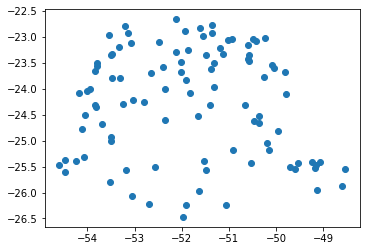

In [24]:
# plot aeroportos em PR
aeroportos_pr.plot()

In [25]:
aeroportos_pr.columns

Index(['OBJECTID', 'FID_1', 'cod_icao', 'nm_municip', 'TipoAero', 'nome',
       'largura_m', 'num_pista', 'uf_left', 'altitude', 'extensao', 'cod_uso',
       'pavimento', 'GEOCODIGO', 'geometry', 'index_right', 'id', 'id_pk',
       'geocodigo', 'municipio', 'uf_right', 'regiao', 'area'],
      dtype='object')

(array([97.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  2.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

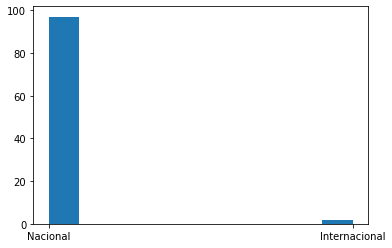

In [26]:
import matplotlib.pyplot as plt

# retorna plot por TipoAereo
plt.hist(x=aeroportos_pr['TipoAero'])

(array([43.,  0., 37.,  0.,  0., 12.,  0.,  6.,  0.,  1.]),
 array([0. , 0.4, 0.8, 1.2, 1.6, 2. , 2.4, 2.8, 3.2, 3.6, 4. ]),
 <BarContainer object of 10 artists>)

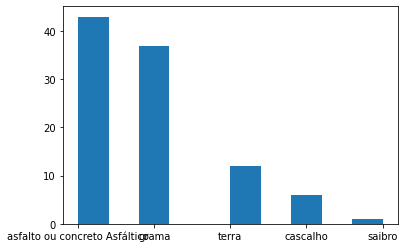

In [27]:
# retorna plot por pavimento
plt.hist(x=aeroportos_pr['pavimento'])

In [28]:
# CONTAINS
# retorna o polígono que contem o ponto


# filtra por UF, retornando todas as linhas que são relativas ao Paraná
municipios_pr = municipios[municipios['uf'] == 'PR']

# retorna os municipios que possuem aeroportos
# retorna as colunas de ambos os datasets
municipios_com_aeroportos = gpd.sjoin(municipios_pr, aeroportos, op='contains')
municipios_com_aeroportos.head()

,id,id_pk,geocodigo,municipio,uf_left,regiao,area,geometry,index_right,OBJECTID,...,TipoAero,nome,largura_m,num_pista,uf_right,altitude,extensao,cod_uso,pavimento,GEOCODIGO
847,901,5894,4111555,Ivaté,PR,Sul,None,"POLYGON ((-53.44312 -23.39659, -53.44272 -23.3...",934,935,...,Nacional,Fazenda Serra Dourada,30.0,1,PR,307.0,729.0,PRIV,grama,4111555.0
1290,1291,5987,4118501,Pato Branco,PR,Sul,None,"POLYGON ((-52.71938 -26.14383, -52.71981 -26.1...",375,376,...,Nacional,Pato Branco,30.0,1,PR,822.0,1400.0,PUB,asfalto ou concreto Asfáltico,4118501.0
1291,1292,6016,4120606,Prudentópolis,PR,Sul,None,"POLYGON ((-51.33459 -24.92907, -51.33538 -24.9...",945,946,...,Nacional,Prudentópolis,18.0,1,PR,747.0,400.0,PRIV,terra,4120606.0
1292,1293,6017,4120655,Quarto Centenário,PR,Sul,None,"POLYGON ((-53.12084 -24.40744, -53.12148 -24.4...",946,947,...,Nacional,Fazenda Alvorada,18.0,1,PR,400.0,800.0,PRIV,grama,4120655.0
1467,1462,5939,4115200,Maringá,PR,Sul,None,"POLYGON ((-52.00944 -23.31223, -52.00906 -23.3...",373,374,...,Nacional,Regional de Maringá - Sílvio Name Júnior,45.0,1,PR,545.0,2100.0,PUB,asfalto ou concreto Asfáltico,4115200.0


<AxesSubplot:>

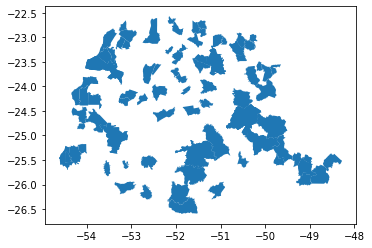

In [29]:
municipios_com_aeroportos.plot()

<AxesSubplot:>

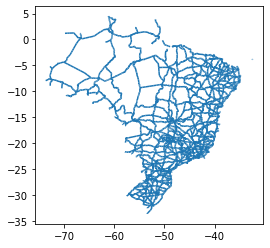

In [33]:
# INTERSECT
# Como saber quais rodovias tocam o estado do PR?

path = os.getcwd() + '/dados/municipios.shp'
municipios = gpd.read_file(path)
municipios_pr = municipios[municipios['uf'] == 'PR']

# lendo dataset de rodovias e criando GeoDataframe
path_rodovias = os.getcwd() + '/dados/rodovias.shp'
rodovias = gpd.read_file(path_rodovias)

# plot de todas as rodovias do BR
rodovias.plot()

<AxesSubplot:>

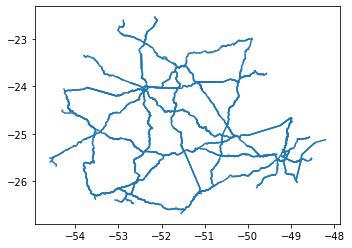

In [32]:
# retorna as rodovias que intesectam/tocam o estado do Paraná
rodovias_pr = gpd.sjoin(rodovias, municipios_pr, op='intersects')

# plot de rodovias que intersectam o PR
rodovias_pr.plot()

# OVERLAY

In [ ]:
# Retorna as rodovias que intesectam/tocam o estado do Paraná
# Mais exato que o sjoin(op=intersects), pois não deixa sobras de estradas
# que não tocam mais o estado do PR
rodovias_pr = gpd.overlay(rodovias, municipios_pr, how='intersection')
rodovias_pr.head(3)

In [ ]:
rodovias_pr.plot()